### Relational Database API Specification

- For accessing relational databases, the Python community has developed a standard known as the **Python Database API Specification V2.0**, or [**PEP 249**](http://www.python.org/dev/peps/pep-249/) for short. Specific database modules (e.g., MySQL, Oracle, and so on) follow this specification, but may add even more features.This section covers the essential elements needed to use it for most applications.

- At a high level, the database API defines a set of functions and objects for connecting to a database server, executing SQL queries, and obtaining results. Two primary objects are used for this: 
    - a `Connection` object that manages the connection to the database and
    - a `Cursor` object that is used to perform queries.

#### Connections

- `c.close()`: Closes the connection to the server.
- `c.commit()`: Commits all pending transactions to the database.
- `c.rollback()`: Rolls back the database to the start of any pending transactions. This method is sometimes used in databases that do not support transactions in order to undo any changes made to the database.
- `c.cursor()`: Creates a new Cursor object that uses the connection. A cursor is an object that you will use to execute SQL queries and obtain results.

#### Cursors


- `cur.callproc(procname, [, parameters])`

   Calls a stored procedure with name procname. parameters, which is a sequence of values that are used as the arguments to the procedure.The result of this function is a sequence with the same number of items as parameters.This sequence is a copy of parameters where the values of any output arguments have been replaced with their modified values after execution.


- `cur.close()`
    
   Closes the cursor, preventing any further operations on it.


- `cur.execute(query [, parameters])`

    Executes a query or command query on the database. query is a string containing the command (usually SQL), and parameters is either a sequence or mapping that is used to supply values to variables in the query string.


- `cur.fetchone()`

    - Returns the next row of the result set produced by `execute()` or `executemany()`. The way to understand this is that once a query executes, it fetches a table, and this command fetches one row. The result is typically a list or tuple containing values for the different columns of the result. `None` is returned if there are no more rows available.
    ]- Although not required by the specification, the Cursor `cur` object in most database modules **also implements the iteration protocol*.
    

- `cur.fetchmany([size])`

    Returns a sequence of result rows (e.g., a list of tuples). `size` is the number of rows to return. If omitted, the value of `cur.arraysize` is used as a default. The actual number of rows returned may be less than requested.
    

- `cur.fetchall()`

    Returns a sequence of all remaining result rows (e.g., a list of tuples).
    

- `cur.nextset()`
    
    Discards all remaining rows in the current result set and skips to the next result set (if any). Returns None if there are no more result sets; otherwise, a True value is returned and subsequent `fetch*()` operations return data from the new set.
    

- `cur.setinputsize(sizes)`

    Gives the cursor a hint about the parameters to be passed on subsequent `execute*()` methods. `sizes` is a sequence of type objects (described shortly) or integers which give the maximum expected string length for each parameter.
    

- `cur.setoutputsize(size [, column])`

    Sets the buffer size for a specific column in result sets. column is an integer index into the result row, and size is the number of bytes. A typical use of this method is to set limits on large database columns such as strings, `BLOB`s, and `LONG`s prior to making any `execute*()` calls. 
    

- `cur.arraysize`

    An integer that gives the default value used for the `fetchmany()` operation.
    
    
- `cur.description`

    A sequence of tuples that give information about each column in the current result set, essentially returning the schema.

#### Forming Queries

- You should **never manually form queries using Python string operations**, since it opens up the code to a potential SQL injection attack.

- All database modules **provide their own mechanism for value substitution**, but sadly, there is no standard convention for placeholders across database module implementations. However, each module defines a variable `paramstyle` that indicates the formatting of value substitutions to be used in queries.

#### Type Objects

- When working with database data, built-in types such as integers and strings are usually mapped to an equivalent type in the database. 

- For dates, binary data, and other special types, data management is more tricky. To assist with this mapping, database modules implement a set of constructor functions for creating objects of various types, such as `Date`, `Time`, `Timestamp`, `DateFromTicks`, `TimeFromTicks`, `TimeStampFromTicks`, `Binary`. Page 301 of [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References) has more detailed description.

- In addition to the constructor functions aforementioned, the following type objects might be defined. The purpose of these codes is to perform type checking against the type_code field of `cur.description`.

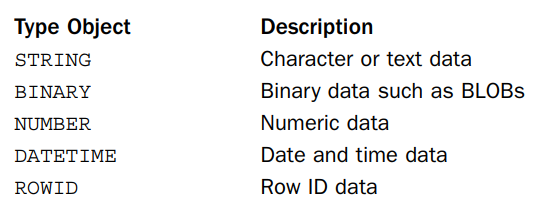

#### Error Handling

Database modules define a top-level exception Error that is a base class for all other errors. The following exceptions are for more specific kinds of database errors:

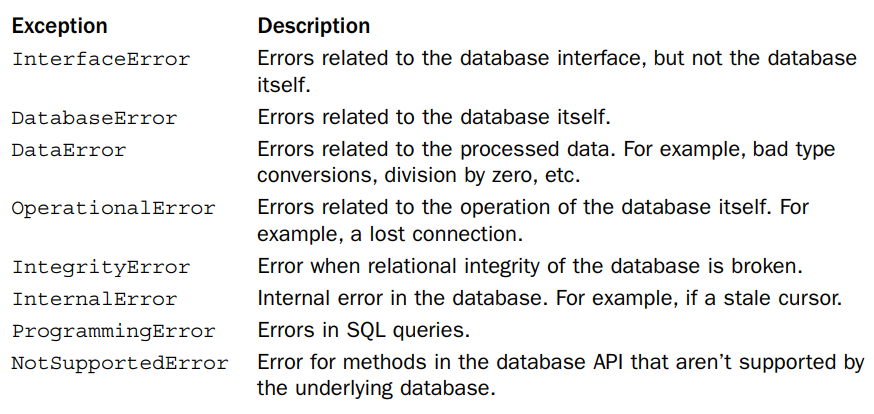

#### Mapping Results into Dictionaries

- It may be beneficial to write a generator which iterate each row by yielding a dictionary; see the code snippet on Page 303 of [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References). Just be aware that the naming of columns is not entirely consistent between databases—
especially with respect to things such as case sensitivity.

### SQLite3 Module

The [`sqlite3`](http://www.sqlite.org) module provides a Python interface to the `SQLite` database library. `SQLite` is a `C` library that implements a self-contained relational database entirely within a file or in memory. Although it is simple, this library is attractive for various reasons. 
- It **does not rely upon a separate database server nor does it require any kind of special configuration** — you can start to use it right away in your programs by simply connecting to a database file (and if it doesn’t exist, a new file is created).
- The database also **supports transactions for improved reliability (even across system crashes)** as well as **locking to allow the same database file to be simultaneously accessed from multiple processes**.

(to read its specific APIs if needed)

### DBM-Style Database Module

- Python includes a number of library modules for supporting UNIX DBM-style database files. Several standard types of these databases are supported.

- All of these modules provide an object that implements a persistent string-based dictionary.That is, it works like a Python dictionary except that all keys and values are restricted to strings.

(to read its specific APIs if needed)

### Shelve Module

- The `shelve` module provides support for persistent objects using a special “shelf” object.

- This object behaves like a dictionary except that **all the objects it contains are stored on disk using a hash-table based database** such as `dbhash`, `dbm` or `gdbm` (see DBM above).

- Unlike those modules, however, the values stored in a shelf **are not restricted to strings**. Instead, **any object that is compatible with the `pickle` module may be stored**.

(to read its specific APIs if needed)

## References
- [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References), Chapter 17.